In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as stat

In [2]:
spect_data = pd.read_csv("SPECTF_test.csv")
actual_class = spect_data["Class"]
print(actual_class.value_counts())
data=spect_data.drop(columns=["Class"]).to_numpy()

No     55
Yes    55
Name: Class, dtype: int64


In [3]:
def EuclideanDistance(point1,point2):
    dist=sum((point1-point2)**2)**0.5
    return dist

def KMeans(data,k):
    centroids={}
    for i in range(k):
        centroids[i]=data[(i*10)+5]
    pred_class={}
    
    while True:
        pred_class={}
        for i in range(k):
            pred_class[i]=[]

        for point in data: 
            distances=[]
            for centroid in centroids:
                dist=EuclideanDistance(point,centroids[centroid])
                distances.append(dist)

            minDist=min(distances)
            minDistIdx=distances.index(minDist)
            pred_class[minDistIdx].append(point)

        oldCentroid=dict(centroids)
        for i in pred_class:
            classData=pred_class[i]
            newCent=np.mean(classData,axis=0)
            centroids[i]=newCent

        flag=True
        for centroid in oldCentroid:
            oldCent=oldCentroid[centroid]
            currCent=centroids[centroid]
            if np.sum((currCent-oldCent)/oldCent*100)>0.001:
                flag=False
        if flag:
            break

    return centroids,pred_class

In [4]:
centroids,pred_class=KMeans(data,2)

# Cluster Sizes obtained
print(len(pred_class[0]))
print(len(pred_class[1]))

24
86


In [5]:
print(centroids)

{0: array([69.375     , 67.54166667, 69.20833333, 67.29166667, 65.54166667,
       62.375     , 71.45833333, 69.45833333, 59.625     , 59.66666667,
       68.66666667, 68.79166667, 63.        , 63.08333333, 55.91666667,
       50.25      , 65.625     , 63.66666667, 60.66666667, 57.        ,
       74.        , 69.75      , 61.83333333, 58.625     , 44.375     ,
       41.75      , 57.45833333, 56.08333333, 58.83333333, 54.125     ,
       69.04166667, 65.75      , 60.        , 57.41666667, 62.04166667,
       59.54166667, 63.375     , 61.33333333, 61.33333333, 58.83333333,
       51.16666667, 45.91666667, 39.83333333, 35.75      ]), 1: array([66.90697674, 66.6627907 , 69.56976744, 71.05813953, 67.63953488,
       68.55813953, 71.29069767, 71.70930233, 65.09302326, 64.59302326,
       70.47674419, 71.22093023, 69.38372093, 70.65116279, 66.5       ,
       65.20930233, 69.19767442, 68.40697674, 68.19767442, 66.46511628,
       74.3372093 , 73.84883721, 70.19767442, 70.76744186, 64.674418

In [6]:

c1 = np.array(pred_class[0])
c1 = c1.reshape(len(pred_class[0]),44)
c2 = np.array(pred_class[1])
c2 = c2.reshape(len(pred_class[1]),44)

In [7]:
c1.shape
c2.shape

(86, 44)

In [8]:
data.shape

(110, 44)

In [9]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0
guessed_data = [None]*110
for i in range(data.shape[0]):
    if list(data[i]) in c1.tolist():
        guessed_data[i] = 'Yes'
        if actual_class[i] == 'Yes':
            true_positive+=1
        else:
            false_positive+=1
    if list(data[i]) in c2.tolist():
        guessed_data[i] = 'No'
        if actual_class[i] == 'Yes':
            false_negative+=1
        else:
            true_negative+=1

In [10]:
print(guessed_data)

['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


In [11]:
actual_data = list(actual_class)

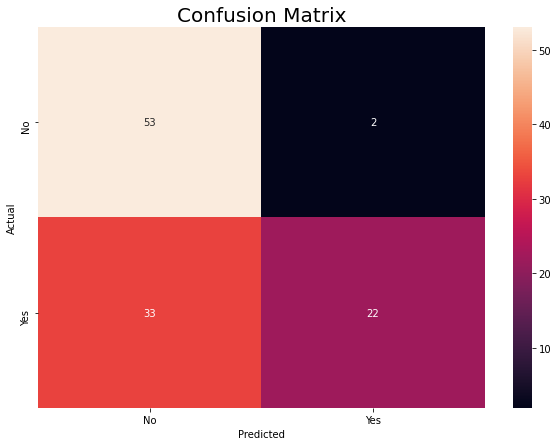

In [12]:
y_actu = pd.Series(actual_data, name='Actual')
y_pred = pd.Series(guessed_data, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)
sn.heatmap(df_confusion, annot=True)
plt.show()

In [13]:
print(actual_data)

['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


In [14]:
print(guessed_data)

['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


In [15]:
print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative)

True Positives: 22
True Negatives: 53
False Positives: 2
False Negatives: 33


In [16]:
# Calculation of metrics
accuracy = 100*(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
precision = true_positive/(false_positive + true_positive)
recall = true_positive/(false_negative + true_positive)
f1score = 2*precision*recall/(precision+recall)

In [17]:
# Printing the final results
print("Accuracy :", accuracy, "%")
print("Precision :", precision*100, "%")
print("Recall :", recall*100, "%")
print("f1score :", f1score)

Accuracy : 68.18181818181819 %
Precision : 91.66666666666666 %
Recall : 40.0 %
f1score : 0.5569620253164558
